# Weekly assignment 4 & 5 : machine learning 

### Objective: Predict the outcomes in a data set using either Random Forest or k-NN.

In [1]:
#importing modules
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans

## Data loading and inspection

### Load data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Explore variables

View 5 first rows and use .info() to inspect columns to select variables

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# create a data set with 8 variables

df1 = df[['Age', 'Gender', 'YearsAtCompany', 'HourlyRate','MonthlyIncome', 'TotalWorkingYears', 'JobLevel', 'YearsSinceLastPromotion']]
df1

,Age,Gender,YearsAtCompany,HourlyRate,MonthlyIncome,TotalWorkingYears,JobLevel,YearsSinceLastPromotion
0,41,Female,6,94,5993,8,2,0
1,49,Male,10,61,5130,10,2,1
2,37,Male,0,92,2090,7,1,0
3,33,Female,8,56,2909,8,1,3
4,27,Male,2,40,3468,6,1,2
...,...,...,...,...,...,...,...,...
1465,36,Male,5,41,2571,17,2,0
1466,39,Male,7,42,9991,9,3,1
1467,27,Male,6,87,6142,6,2,0
1468,49,Male,9,63,5390,17,2,0


Using .describe() toi inspect the data for min, max etc. to see how's the distribution looking initially.

In [6]:
df1.describe()

,Age,YearsAtCompany,HourlyRate,MonthlyIncome,TotalWorkingYears,JobLevel,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,7.008163,65.891156,6502.931293,11.279592,2.063946,2.187755
std,9.135373,6.126525,20.329428,4707.956783,7.780782,1.106940,3.222430
min,18.000000,0.000000,30.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,3.000000,48.000000,2911.000000,6.000000,1.000000,0.000000
50%,36.000000,5.000000,66.000000,4919.000000,10.000000,2.000000,1.000000
75%,43.000000,9.000000,83.750000,8379.000000,15.000000,3.000000,3.000000
max,60.000000,40.000000,100.000000,19999.000000,40.000000,5.000000,15.000000


Get an overview of all values count

In [7]:
for feature in df1:
    print(f"Values Counts for [{feature}]")
    print(df1[feature].value_counts())
    print("\n\n")

Values Counts for [Age]
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64



Values Counts for [Gender]
Male      882
Female    588
Name: Gender, dtype: int64



Values Counts for [YearsAtCompany]
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64



Values Counts for [HourlyRate]
66 

## Introduction: describe which dataset and variables you selected and why

For weekly assignment number 4 I've choosen IBM HR Analytics Employee Attrition & Performance data set from Kaggle. 

For the sake of this assignment I've limited the number of variables (columns) from 35 to 8 in order to make the analysis and prediction easier. 

I've selected following variables: Age, Gender, YearsAtCompany, HourlyRate, MonthlyIncome, TotalWorkingYears, JobLevel, YearsSinceLastPromotion to store in a new dataframe (df1).

I believe that there possibly could be correlations between gender (y variabale) and hourly rate, monthly income, age, job level and years since last promotion (x variables).

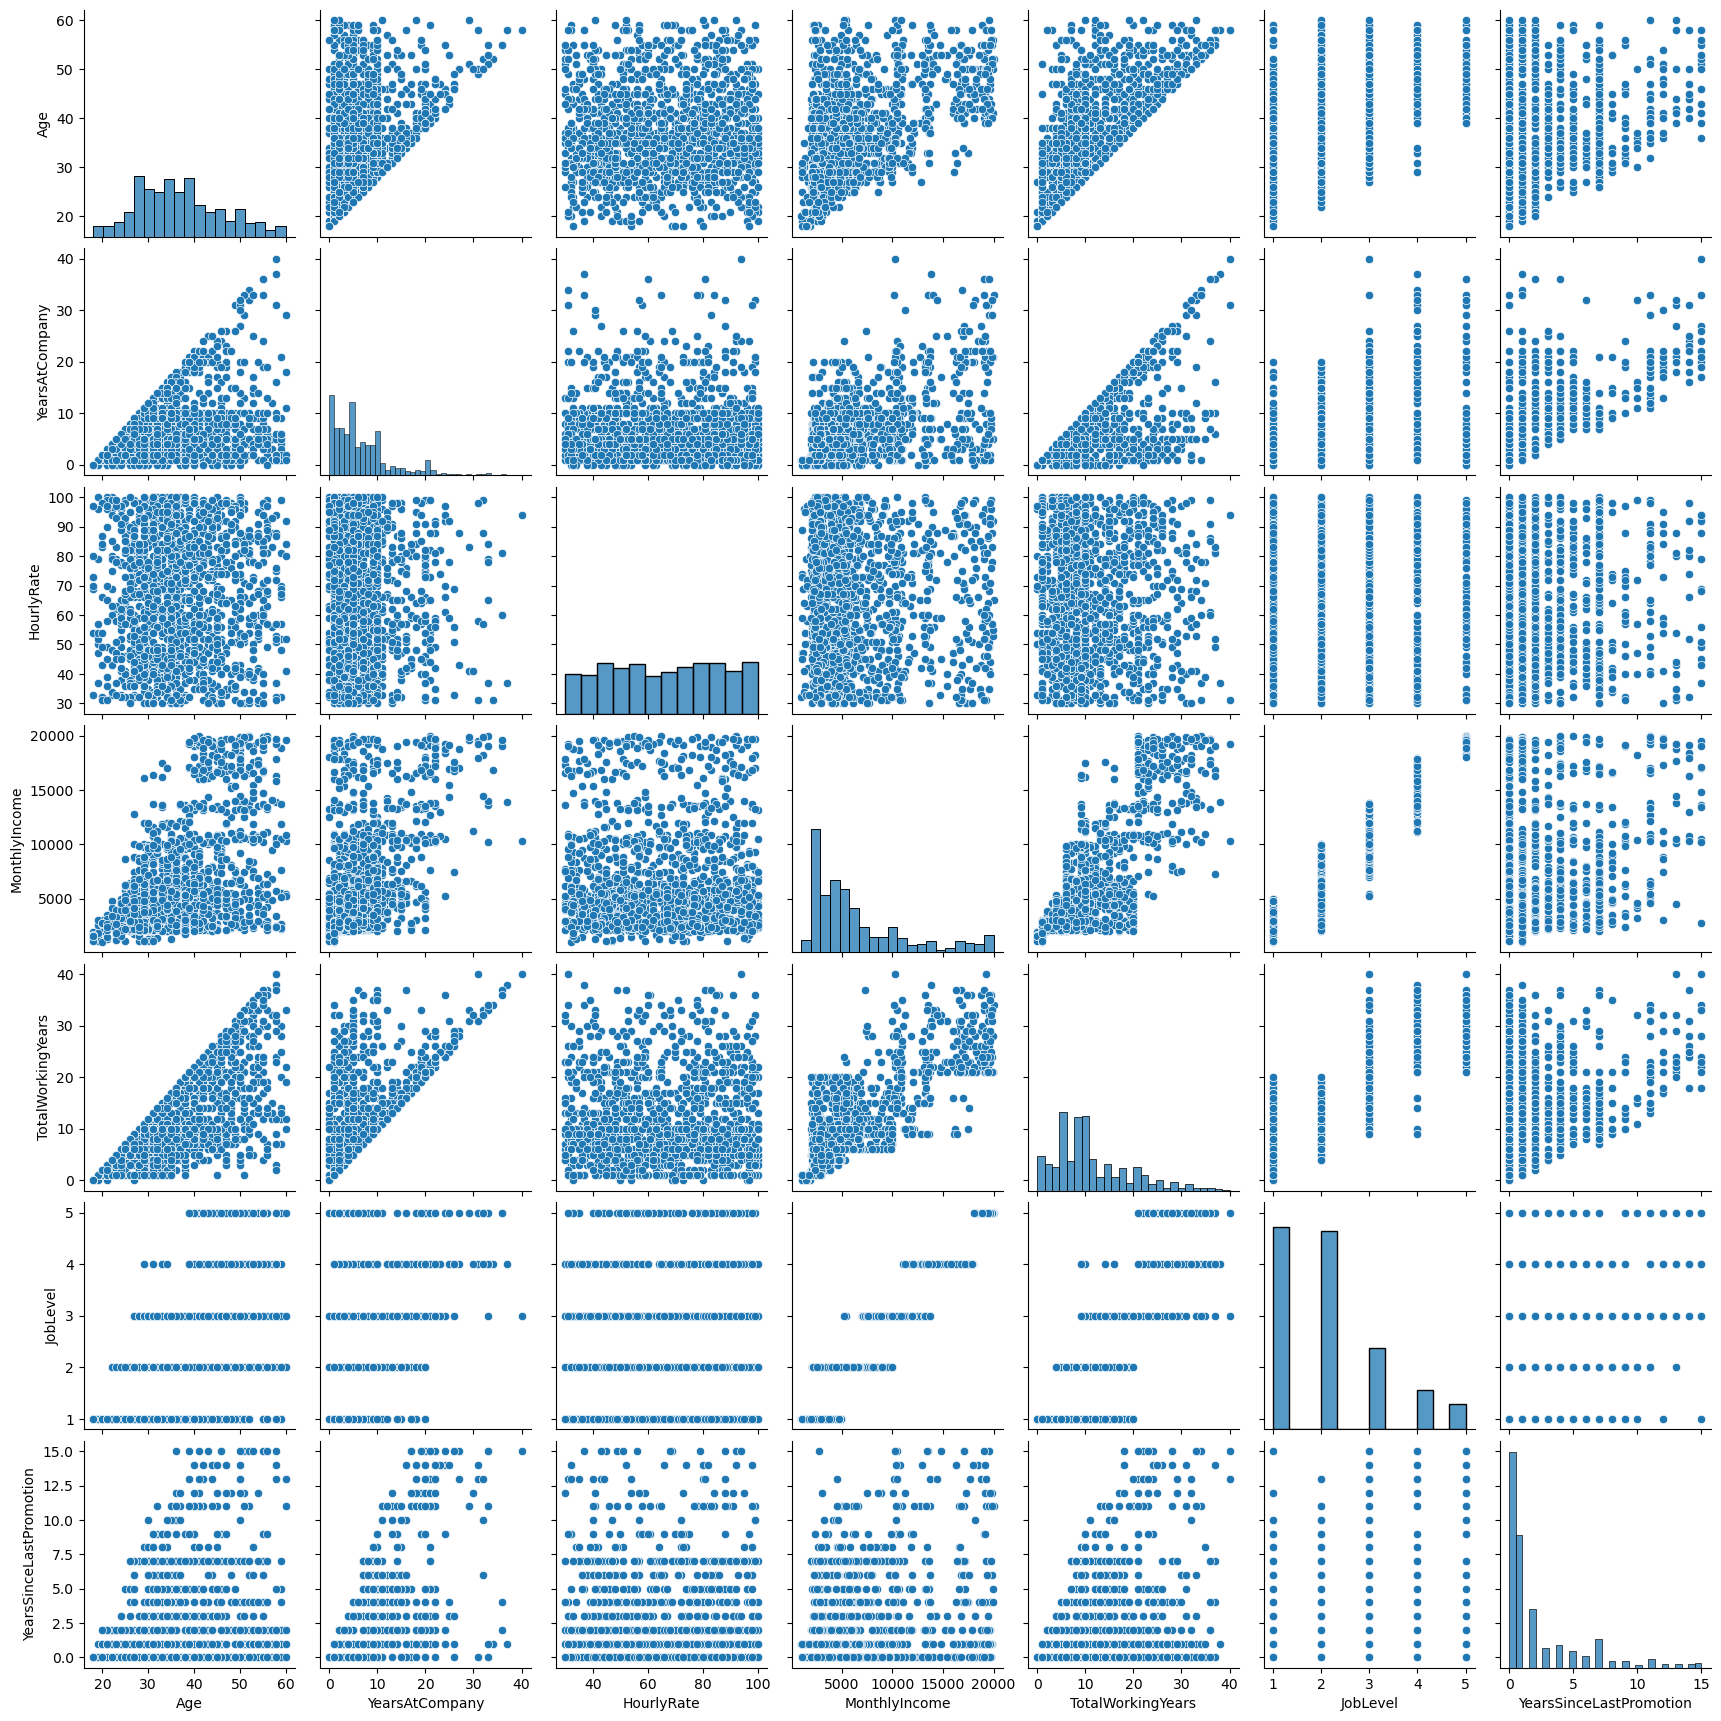

In [8]:
sns.pairplot(df1)
plt.show()

## Data cleaning: describe any data cleaning steps


Considering that there is 1470 rows and all my selected variables (8 columns) have 1470 non-null count means that there is no missing values - therefore I will skip the dropna step

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Gender                   1470 non-null   object
 2   YearsAtCompany           1470 non-null   int64 
 3   HourlyRate               1470 non-null   int64 
 4   MonthlyIncome            1470 non-null   int64 
 5   TotalWorkingYears        1470 non-null   int64 
 6   JobLevel                 1470 non-null   int64 
 7   YearsSinceLastPromotion  1470 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 92.0+ KB


## Exploratory data analysis: present relevant graphs and tables with respect to your problem

Let's see how recenty was participants were promoted

In [10]:
df['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


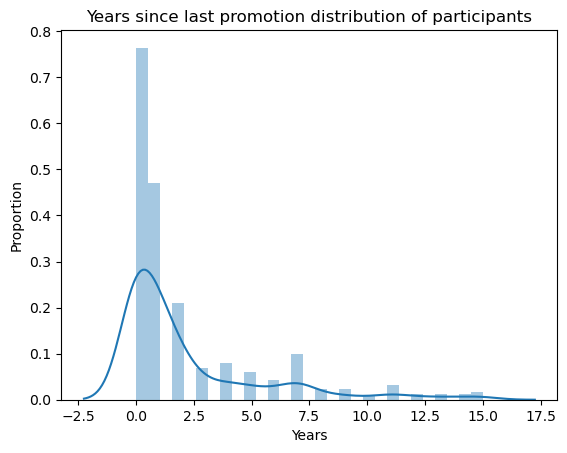

In [11]:
# distplot to visualise the distribution 
sns.distplot(df1["YearsSinceLastPromotion"], hist=True, kde=True) #with histogram
plt.title("Years since last promotion distribution of participants")
plt.xlabel("Years")
plt.ylabel("Proportion")
plt.show()

Majority of participants was promoted less than year ago.

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


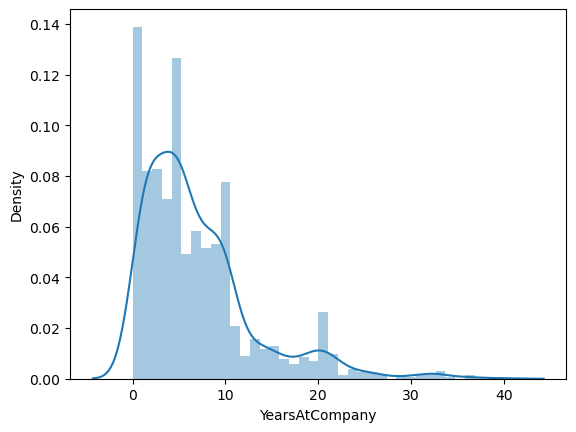

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


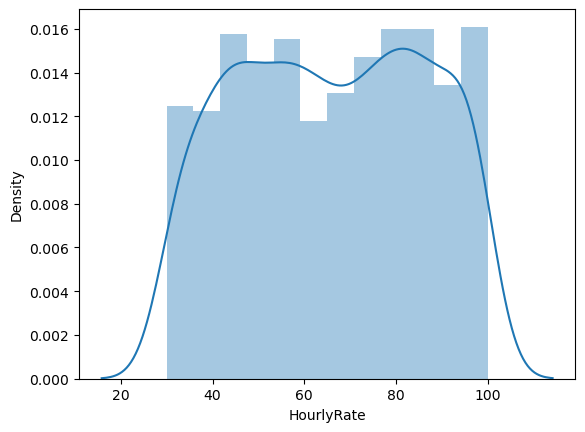

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


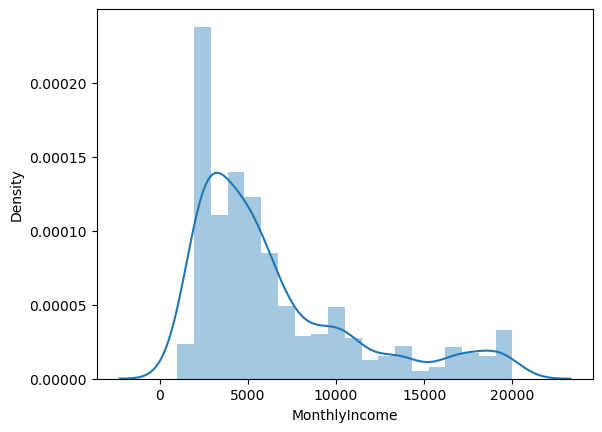

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


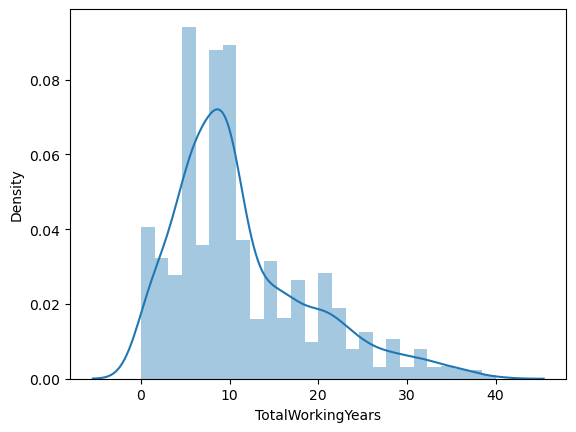

In [12]:

sns.distplot(df['YearsAtCompany'])
plt.show()
sns.distplot(df['HourlyRate'])
plt.show()
sns.distplot(df['MonthlyIncome'])
plt.show()
sns.distplot(df['TotalWorkingYears'])
plt.show()



Description about the plot above:

Normality: 
Variation: 
Modality: there are a lot of peaks but two highest peaks are between 6 and 12.
Skewness:
Outliers: no outliers are present.

## Predictive Model

We have a object type variable (Gender) - string. Let's add dummy variables for the variable *Gender*.

In [13]:
dummies = pd.get_dummies(df1['Gender'])
df1 = pd.concat([df1, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df1.head()

,Age,Gender,YearsAtCompany,HourlyRate,MonthlyIncome,TotalWorkingYears,JobLevel,YearsSinceLastPromotion,Female,Male
0,41,Female,6,94,5993,8,2,0,1,0
1,49,Male,10,61,5130,10,2,1,0,1
2,37,Male,0,92,2090,7,1,0,0,1
3,33,Female,8,56,2909,8,1,3,1,0
4,27,Male,2,40,3468,6,1,2,0,1


In [14]:
x = df1[["Age", "YearsAtCompany", "HourlyRate", "MonthlyIncome", "TotalWorkingYears", "JobLevel","YearsSinceLastPromotion","Female","Male"]]
y = df1["Gender"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

X_train

,Age,YearsAtCompany,HourlyRate,MonthlyIncome,TotalWorkingYears,JobLevel,YearsSinceLastPromotion,Female,Male
99,44,3,67,2042,17,2,1,0,1
785,40,11,61,10322,14,3,11,0,1
918,51,29,83,19847,31,5,11,0,1
1335,39,2,41,3902,7,2,2,0,1
1182,36,3,33,4374,4,2,1,1,0
...,...,...,...,...,...,...,...,...,...
715,33,6,84,5488,6,2,1,1,0
905,29,7,87,16124,9,4,1,1,0
1096,40,21,38,16437,21,4,7,0,1
235,43,17,80,16064,22,4,1,1,0


### Evaluation

Fit the k-nearest neigbor model with the train data.

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

Calculate the fit to the whole df

In [16]:
knn.score(X_test, y_test)

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5351473922902494

Knn score equal to 0,5351 means that the model is able to predict the target variable with 53,51% accuracy

Calculate the percision of all chosen variable of the df:

In [17]:
y_test_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
cm

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ 56, 104],
       [101, 180]])

Calculate the recall for gender

In [18]:
conf_matrix = pd.DataFrame(cm, index=["Male", "Female"], columns = ["Male (predicted)", "Female (predicted)"])
conf_matrix

,Male (predicted),Female (predicted)
Male,56,104
Female,101,180


Calculate the sum of each x axis

In [19]:
conf_matrix.sum(axis =1)

Male      160
Female    281
dtype: int64

Calculate the sum of each y axix

In [20]:
conf_matrix.sum(axis =0)

Male (predicted)      157
Female (predicted)    284
dtype: int64

Calculate now the recall and precision of each gender

In [21]:
(180)/(284)

0.6338028169014085

Male:
- recall = 56/160=.035
- precision = 56/157=0.36

Female:
- recall = 180/281=0.64
- precision = 180/284=0.63

### Conclusion